<a href="https://colab.research.google.com/github/vikastrivedi0/comp313-002-Team-5-F23/blob/main/CostcoStockPredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/vikastrivedi0/StockPricePrediction-Costco-LSTM/main/Costco-Stock-Prices-Datset.csv"

df = pd.read_csv(url)

df.head()

,Date,Time,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits
0,2000-01-03,00:00:00-05:00,31.512873,31.512873,30.431443,30.799129,6057400,costco,COST,retail,usa,0.0,0
1,2000-01-04,00:00:00-05:00,30.777503,30.842389,29.047215,29.112101,5722800,costco,COST,retail,usa,0.0,0
2,2000-01-05,00:00:00-05:00,29.220253,29.717711,28.960709,29.609568,7726400,costco,COST,retail,usa,0.0,0
3,2000-01-06,00:00:00-05:00,29.977260,30.842405,29.934003,30.204361,7221400,costco,COST,retail,usa,0.0,0
4,2000-01-07,00:00:00-05:00,30.063773,32.269891,30.042144,32.205006,5164800,costco,COST,retail,usa,0.0,0


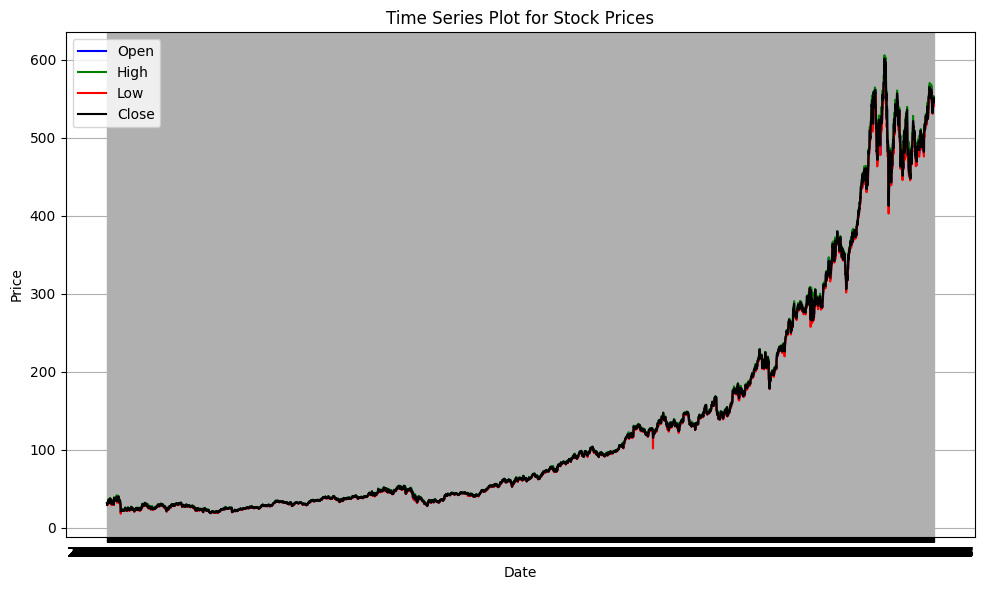

In [4]:

plt.figure(figsize=(10,6))

plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='black')

plt.title('Time Series Plot for Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


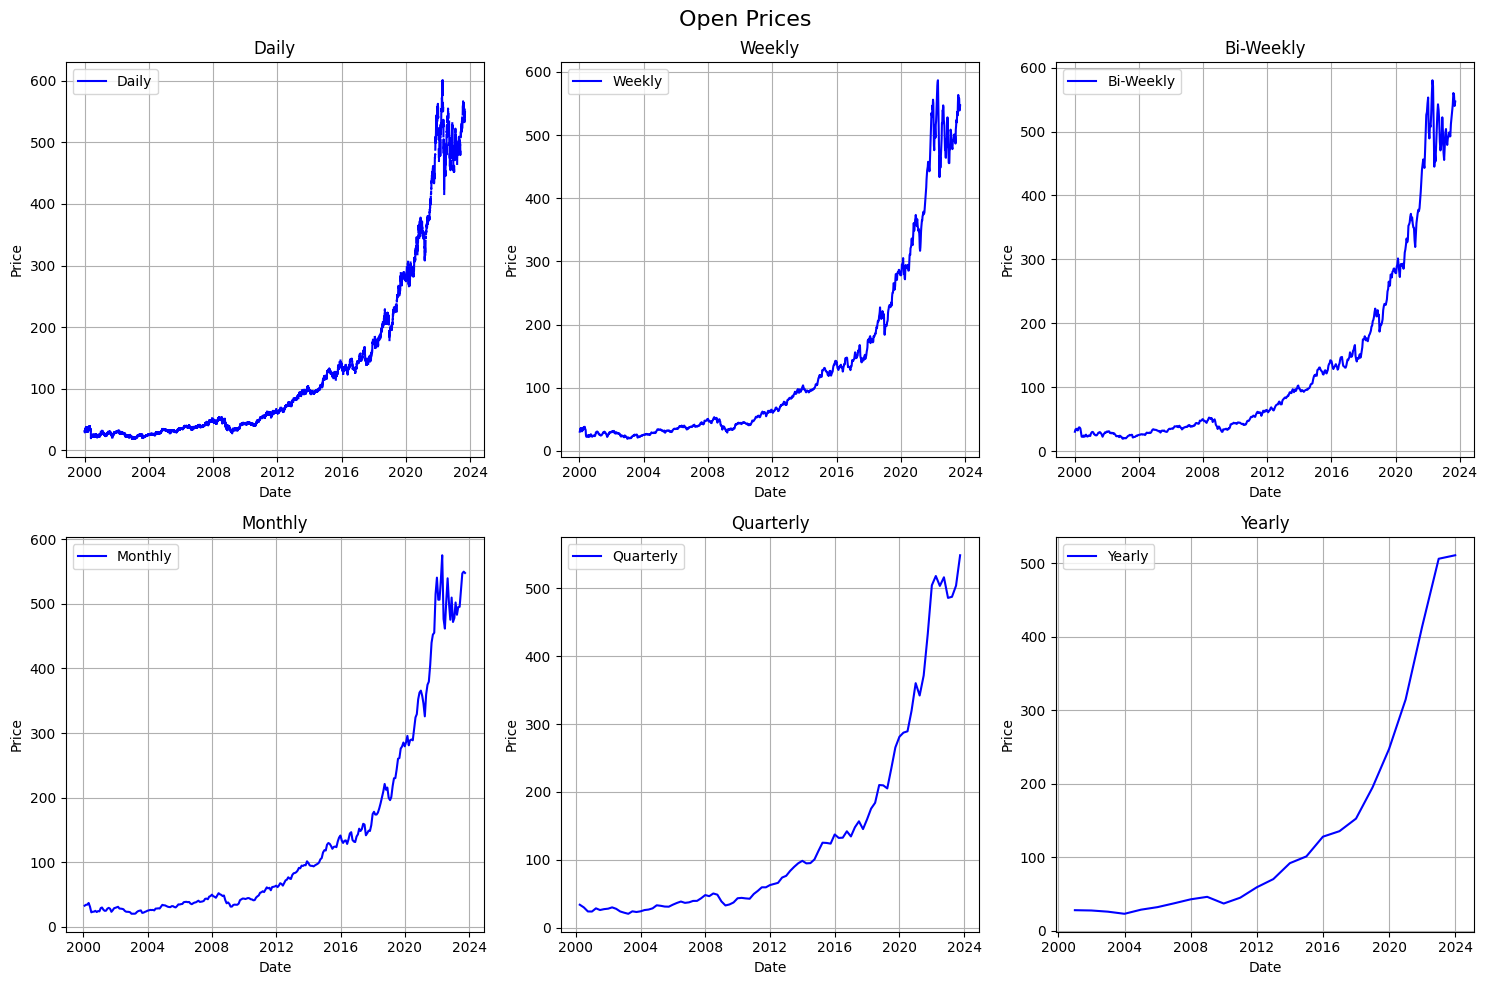

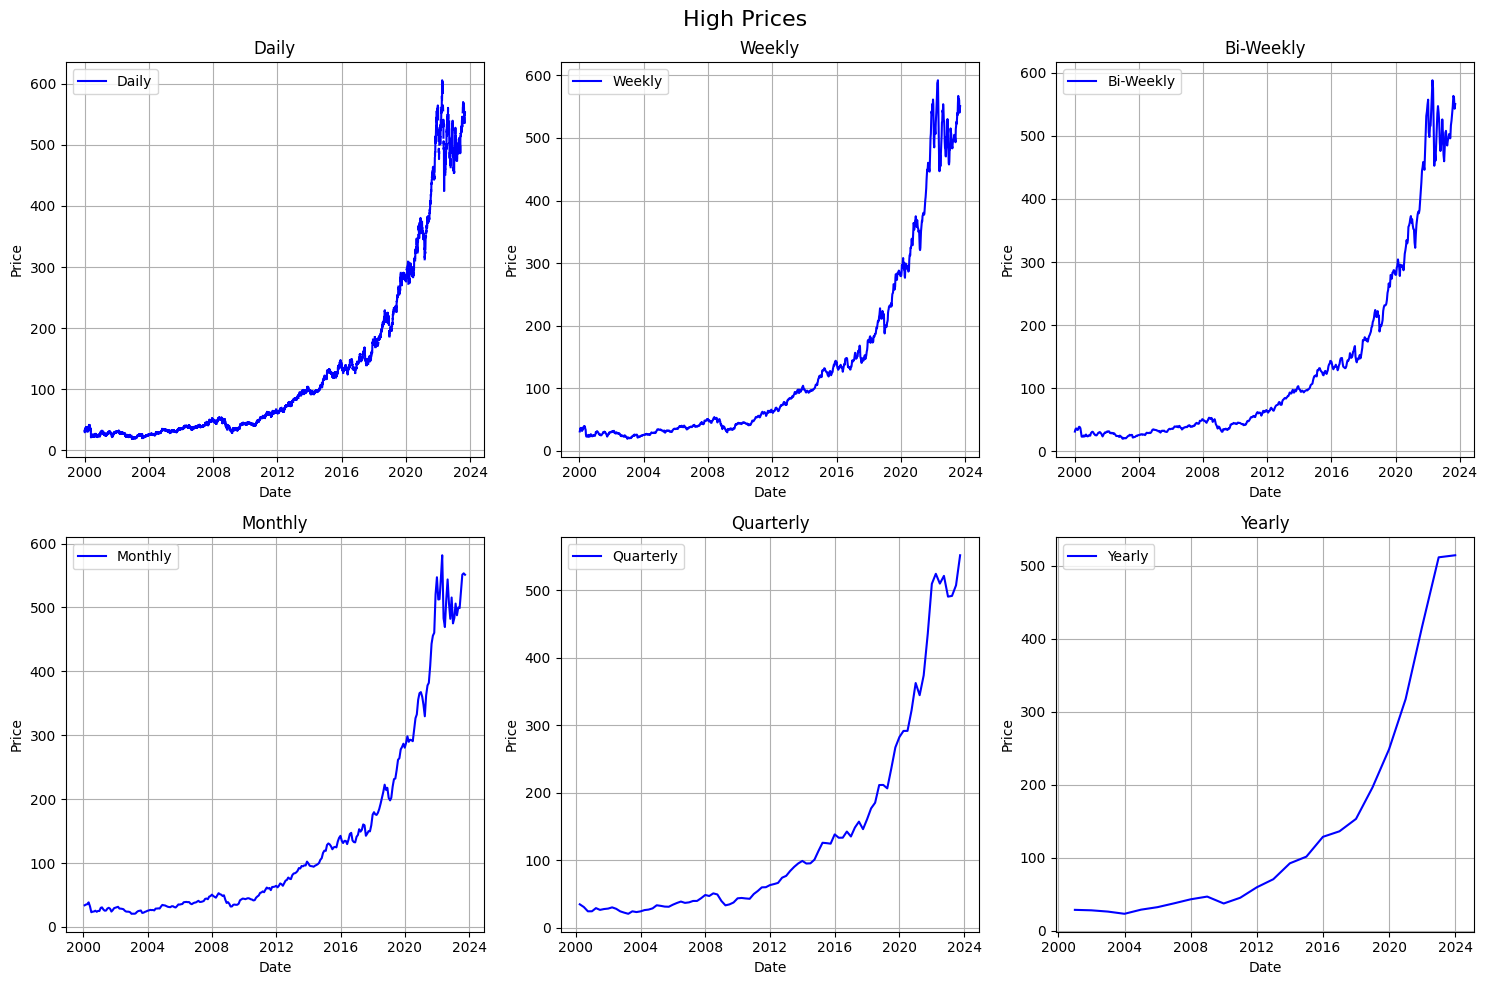

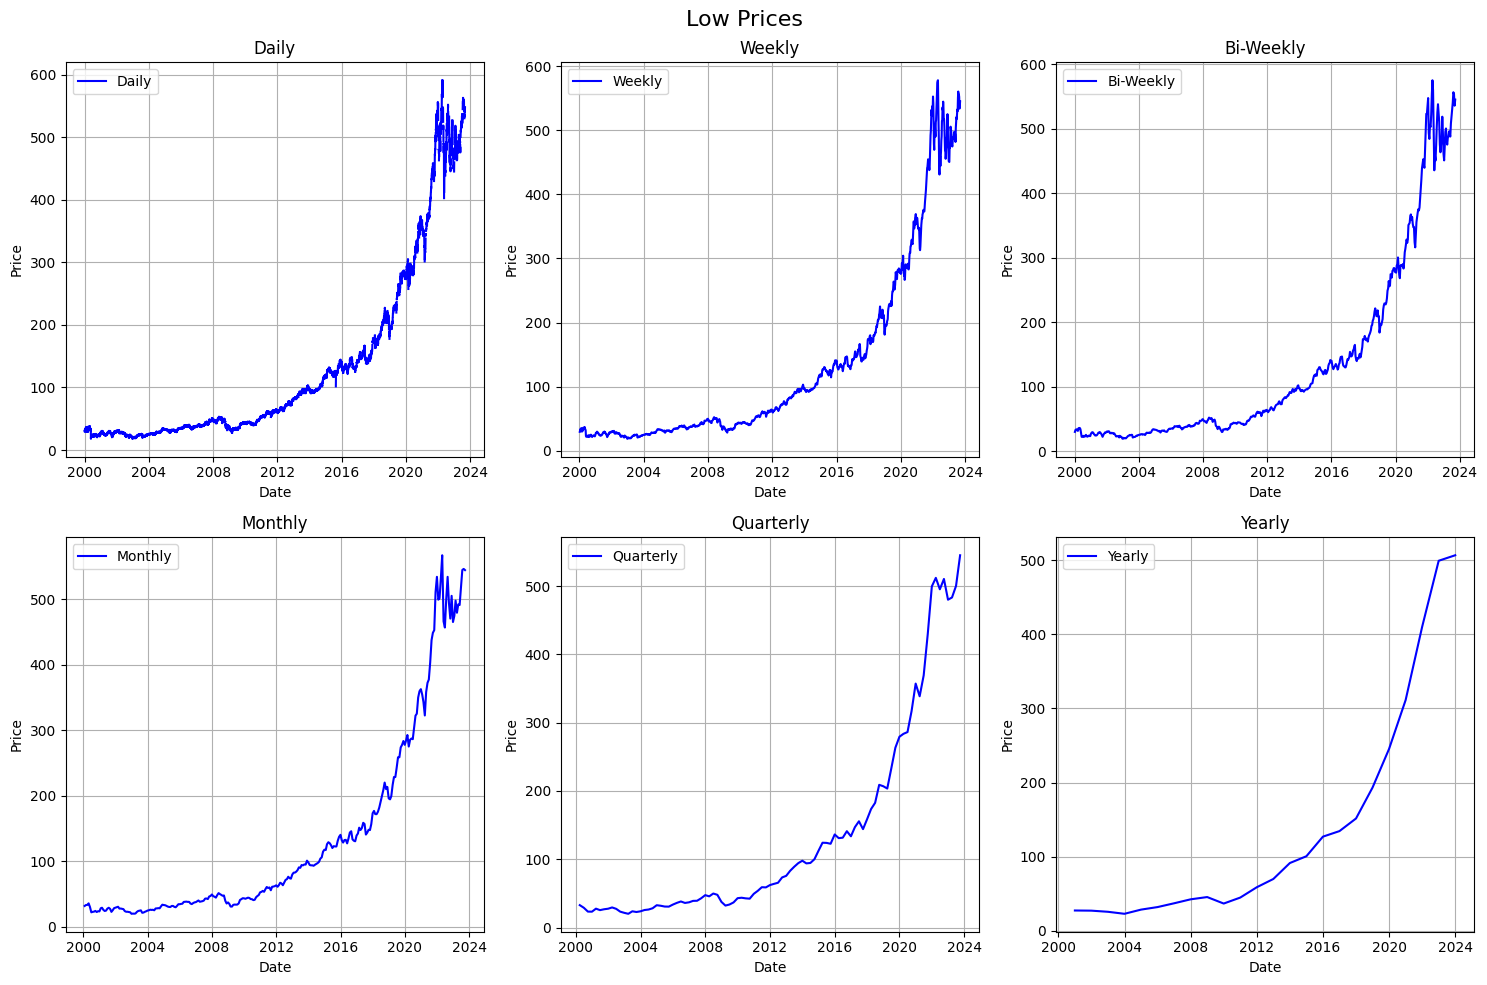

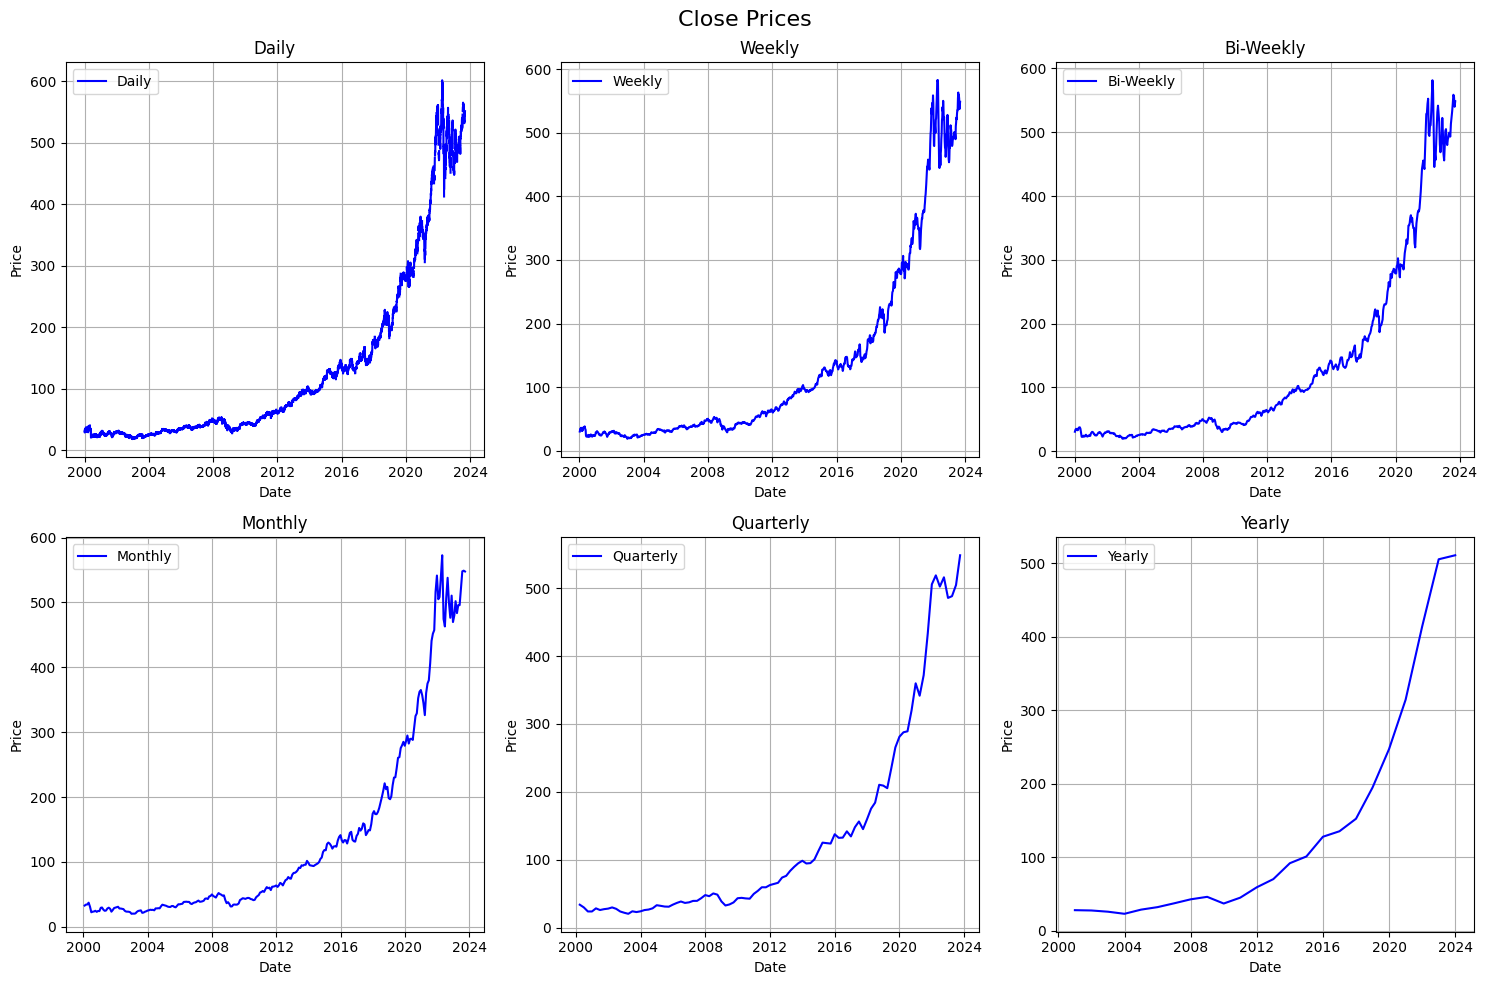

In [6]:
#fucntion to plot each column per frequency

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

def plot_column_with_subplot(ax, df, column, freq, title):
    df_resampled = df[column].resample(freq).mean()
    ax.plot(df_resampled, label=title, color='blue')

    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

columns = ['Open', 'High', 'Low', 'Close']
frequencies = [
    ('D', 'Daily'),
    ('W', 'Weekly'),
    ('2W', 'Bi-Weekly'),
    ('M', 'Monthly'),
    ('Q', 'Quarterly'),
    ('A', 'Yearly')
]

for column in columns:
    fig, axs = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
    fig.suptitle(f"{column} Prices", fontsize=16)

    for ax, (freq, freq_name) in zip(axs.ravel(), frequencies):
        title = f"{freq_name}"
        plot_column_with_subplot(ax, df, column, freq, title)

plt.show()


In [ ]:
unique_counts = df['Time'].value_counts().unique()
print(unique_counts)


[3788 2172]


In [ ]:
dates_with_two_unique_times = df.groupby('Date')['Time'].nunique()
dates_with_two_unique_times = dates_with_two_unique_times[dates_with_two_unique_times == 2].index.tolist()

print(dates_with_two_unique_times)


[]


In [ ]:
unique_times_per_date = df.groupby('Date')['Time'].nunique()

print(unique_times_per_date)


Date
2000-01-03    1
2000-01-04    1
2000-01-05    1
2000-01-06    1
2000-01-07    1
             ..
2023-09-01    1
2023-09-05    1
2023-09-06    1
2023-09-07    1
2023-09-08    1
Name: Time, Length: 5959, dtype: int64


<ipython-input-15-3fb46a278d0c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()  # Resampling. You can use other aggregation methods if preferred.


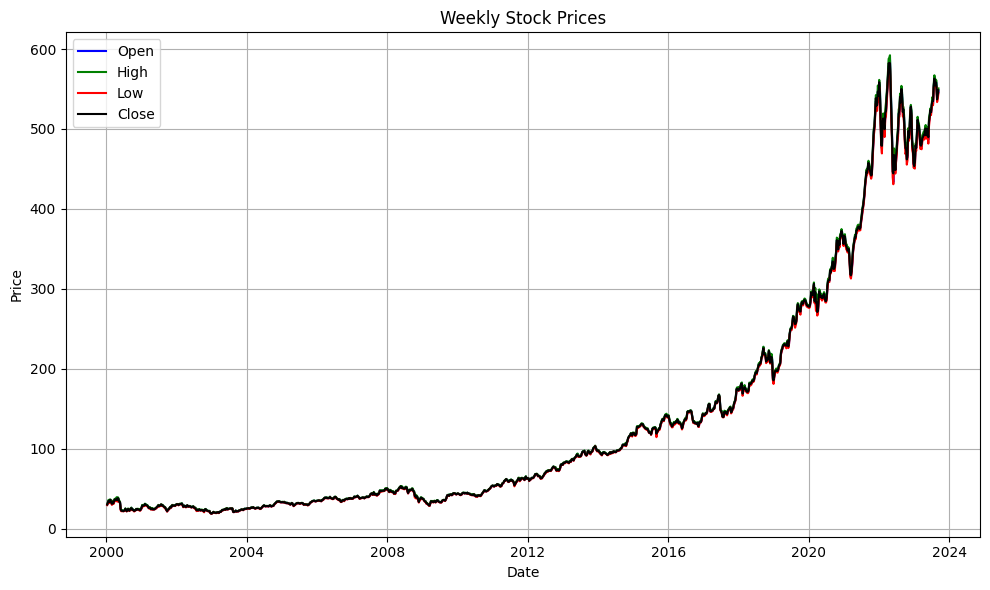

<ipython-input-15-3fb46a278d0c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()  # Resampling. You can use other aggregation methods if preferred.


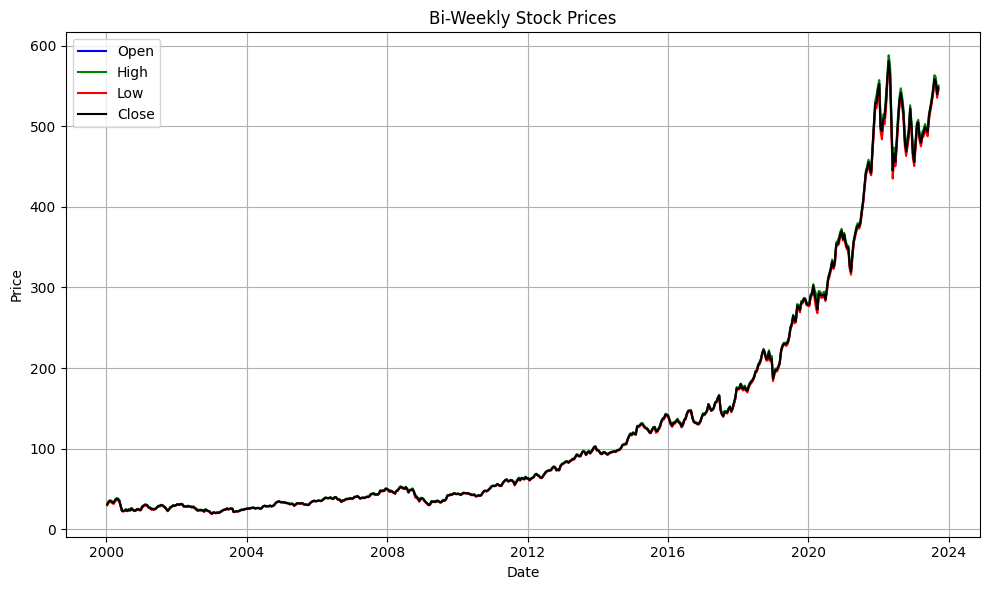

<ipython-input-15-3fb46a278d0c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()  # Resampling. You can use other aggregation methods if preferred.


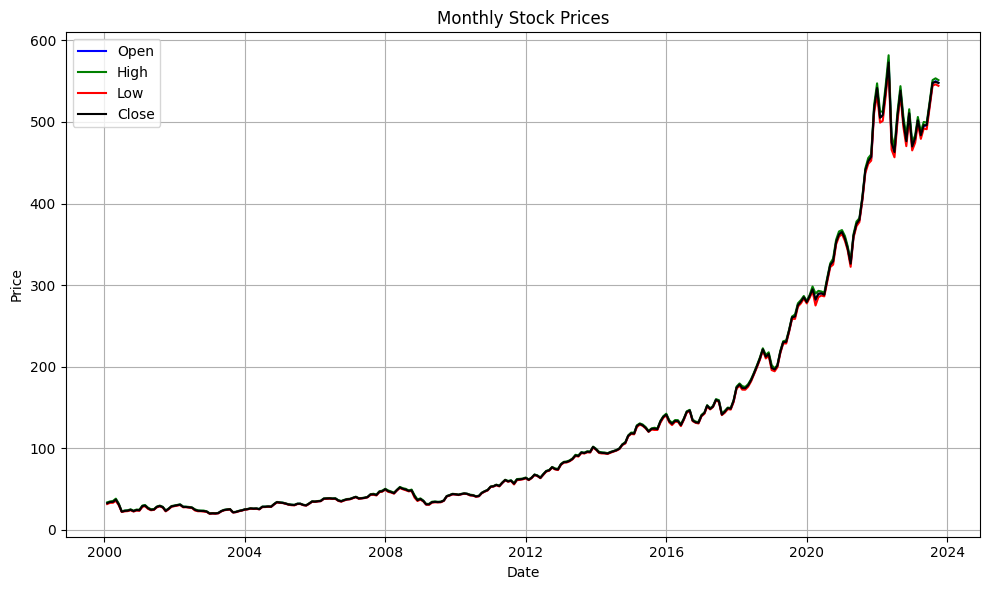

<ipython-input-15-3fb46a278d0c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()  # Resampling. You can use other aggregation methods if preferred.


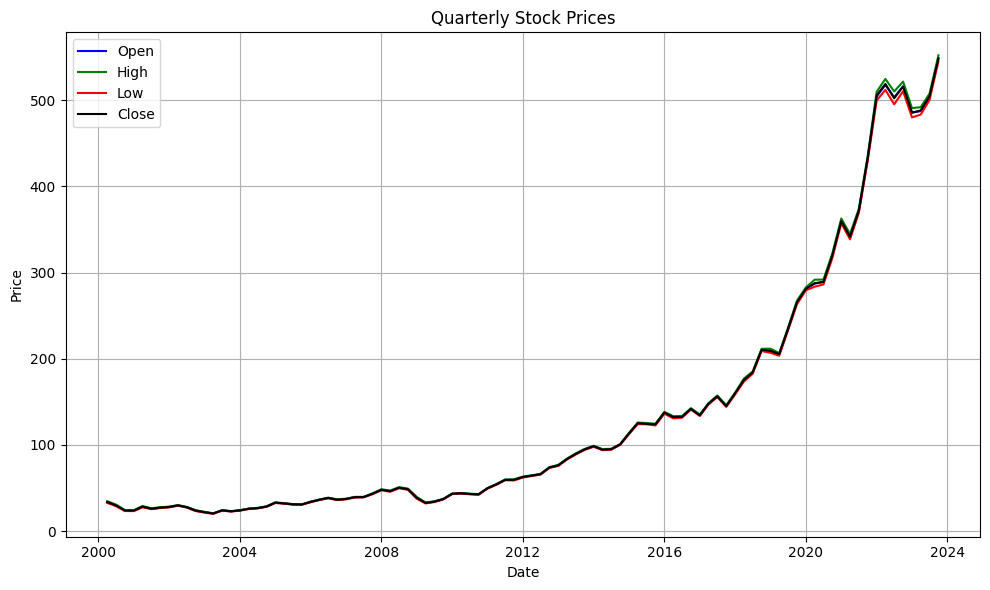

<ipython-input-15-3fb46a278d0c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()  # Resampling. You can use other aggregation methods if preferred.


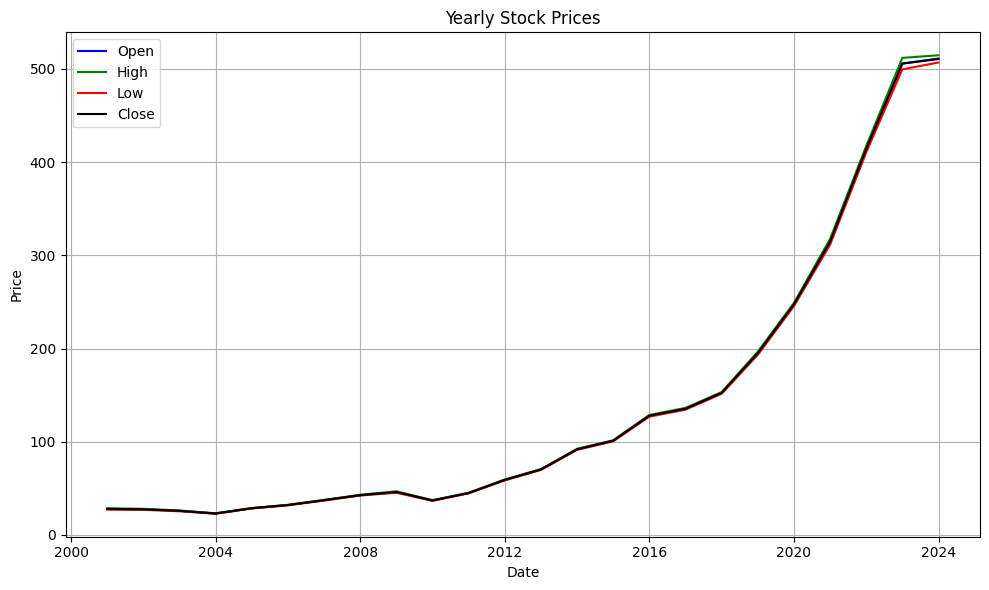

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

def plot_resampled_data(df, freq, title):
    df_resampled = df.resample(freq).mean()

    plt.figure(figsize=(10, 6))
    plt.plot(df_resampled['Open'], label='Open', color='blue')
    plt.plot(df_resampled['High'], label='High', color='green')
    plt.plot(df_resampled['Low'], label='Low', color='red')
    plt.plot(df_resampled['Close'], label='Close', color='black')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


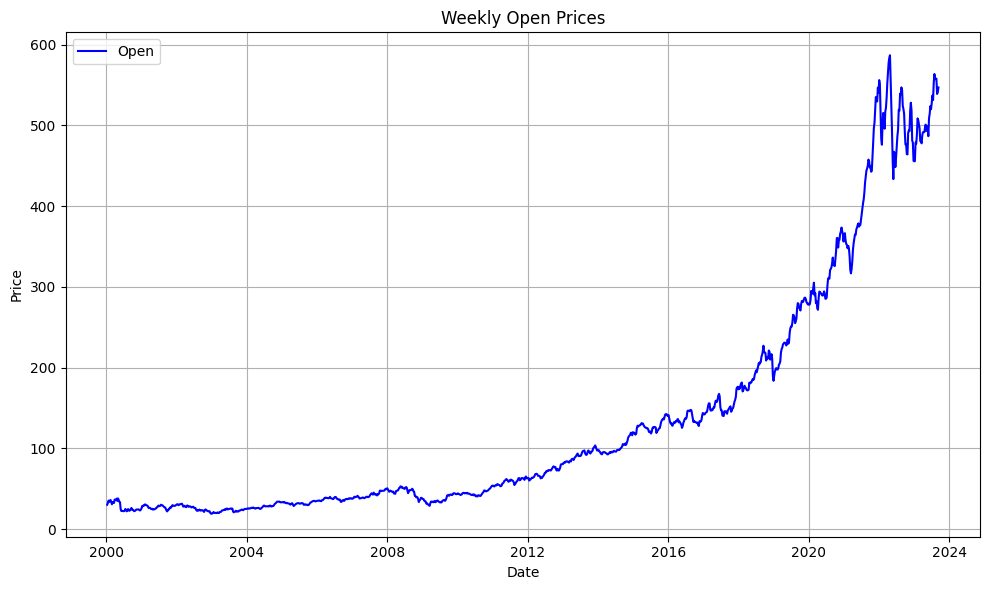

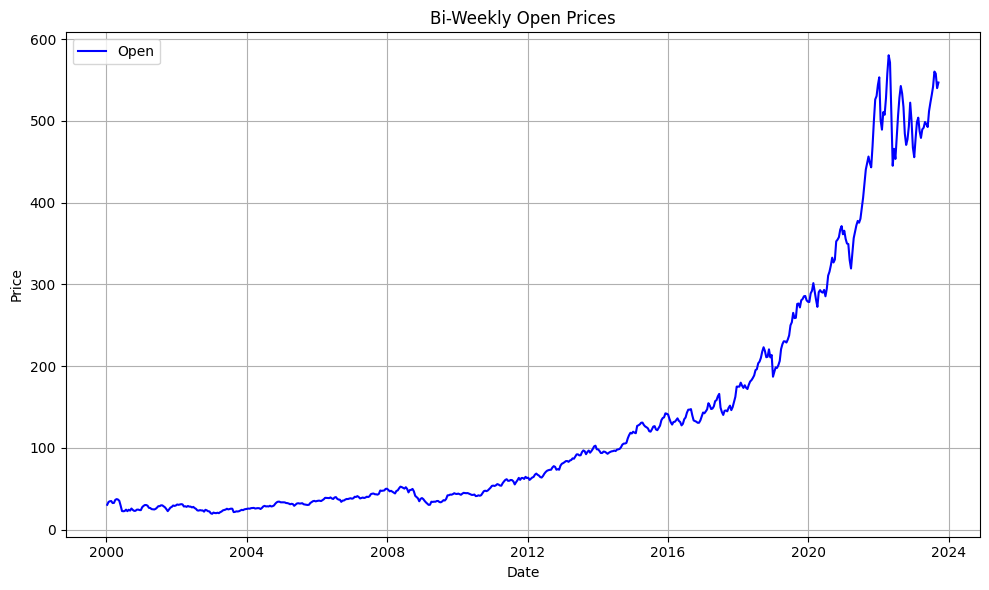

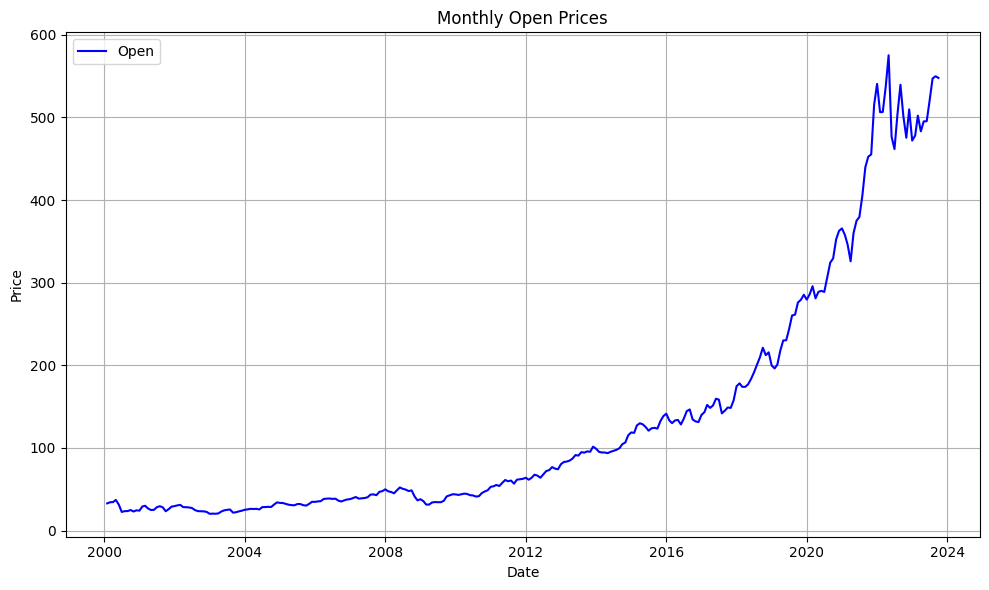

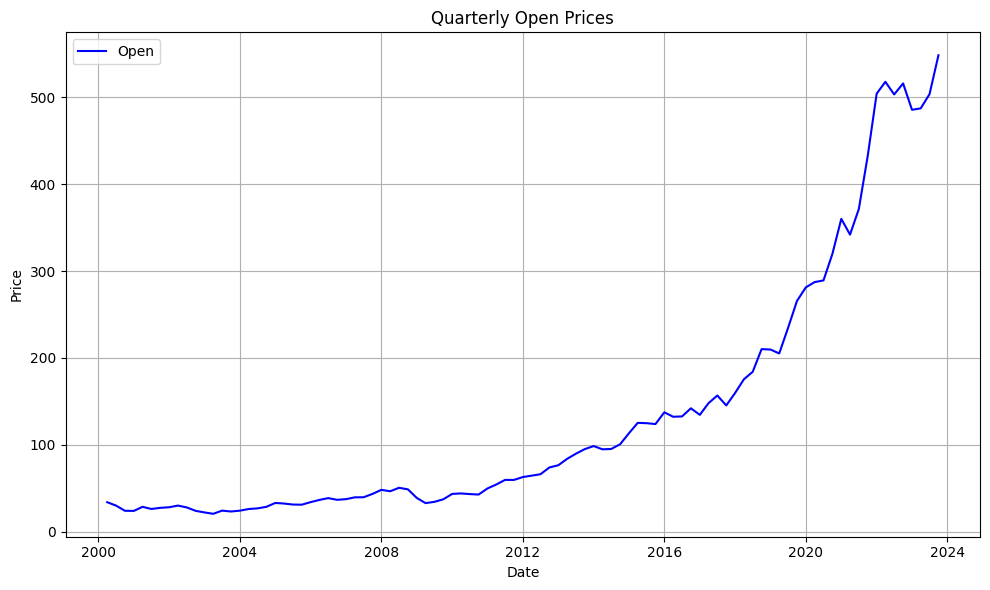

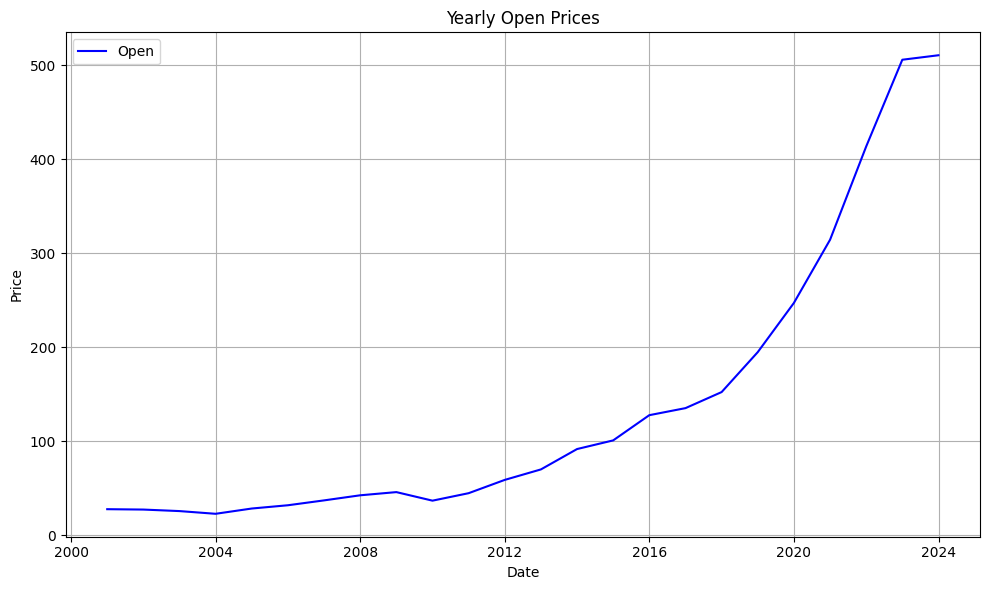

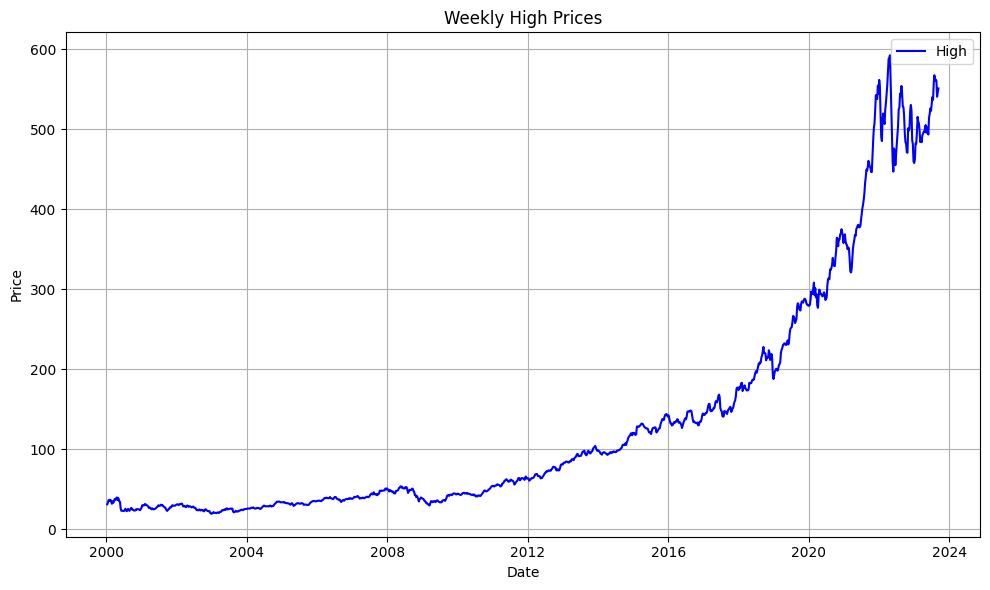

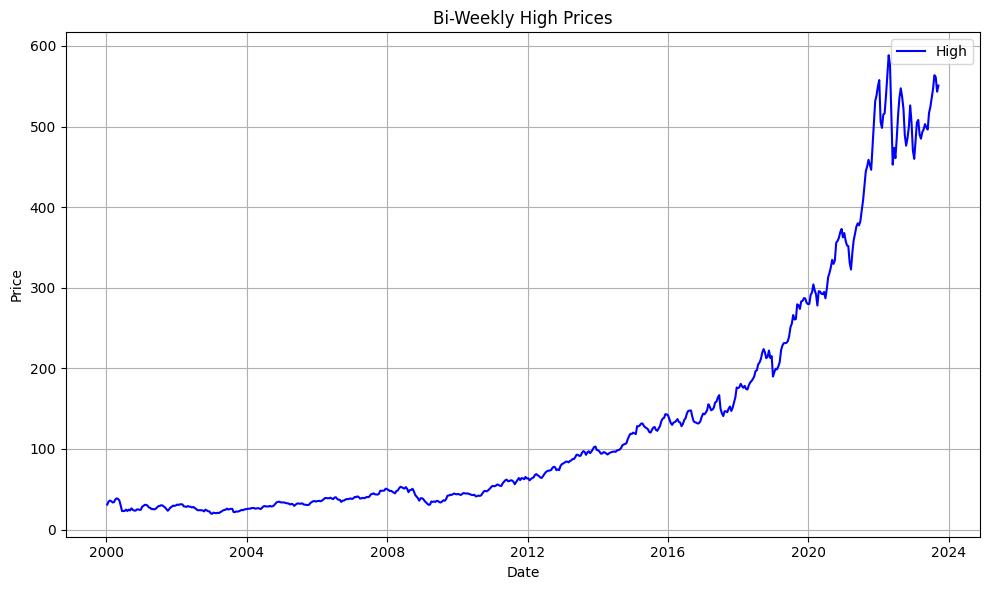

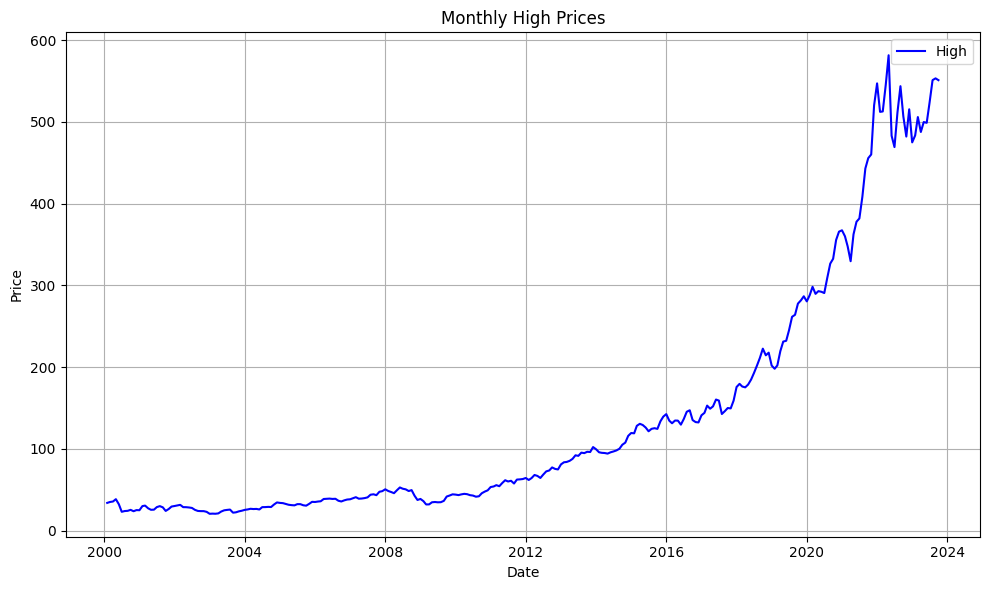

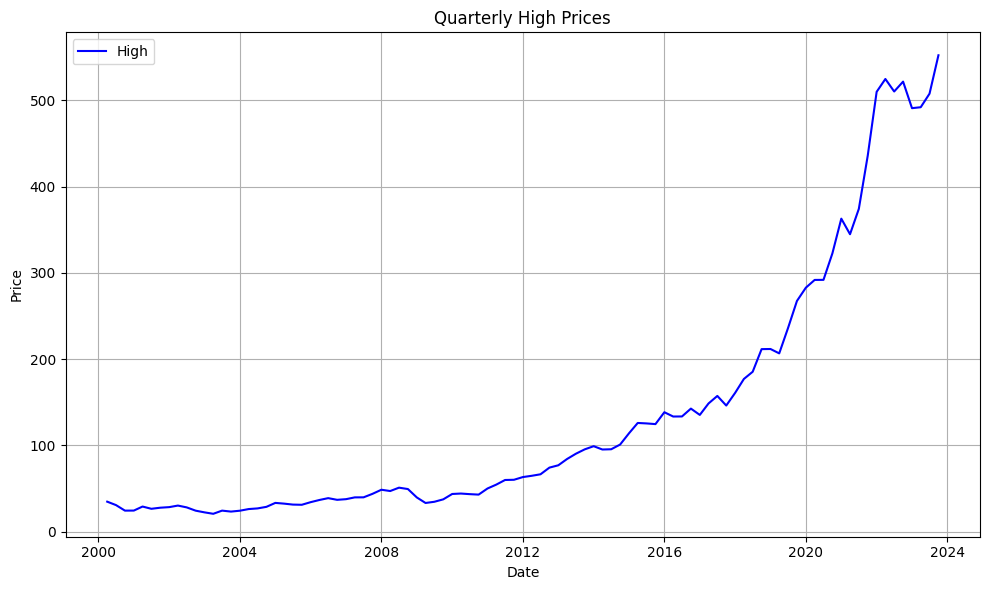

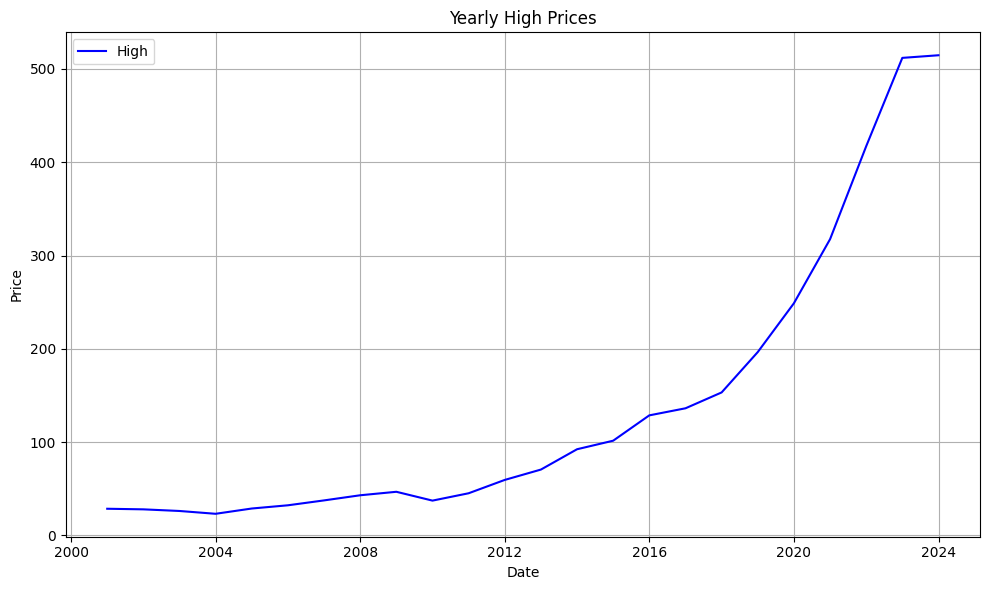

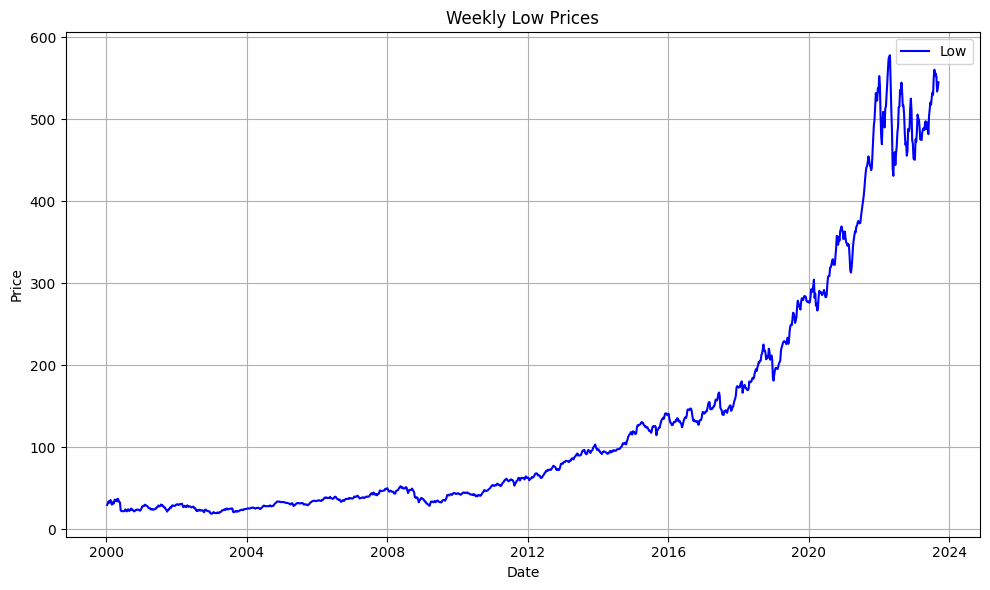

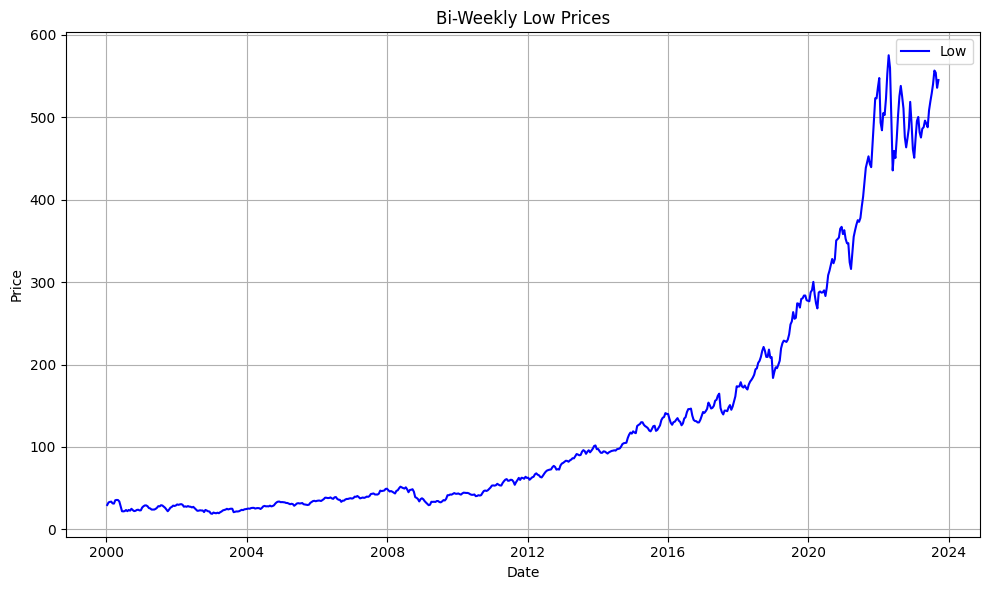

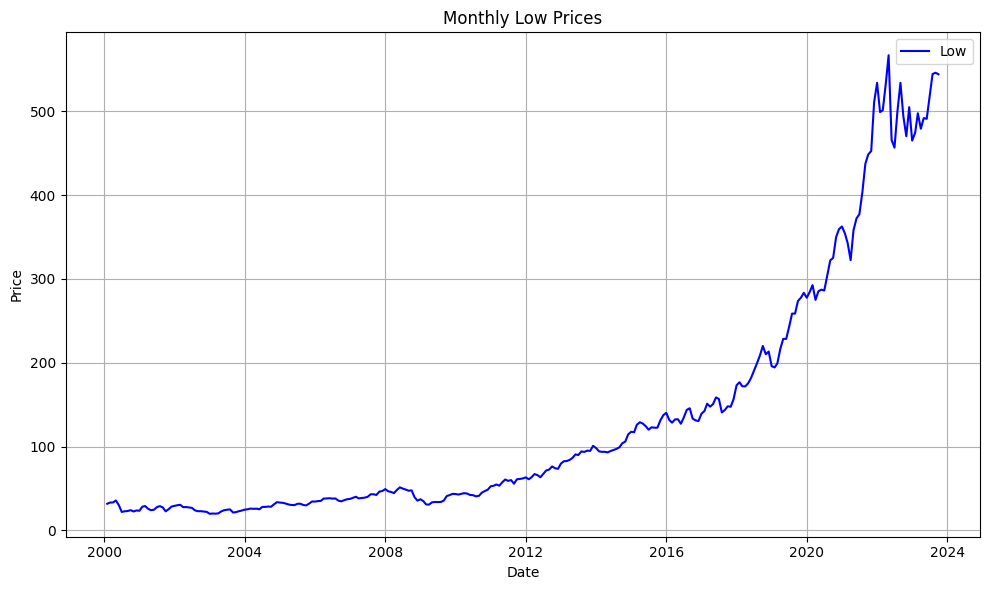

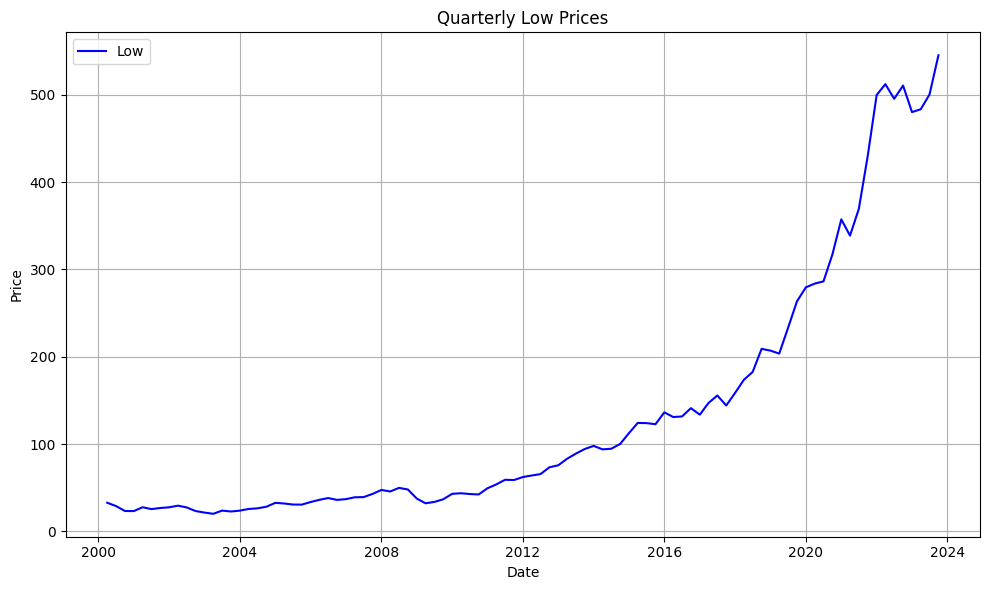

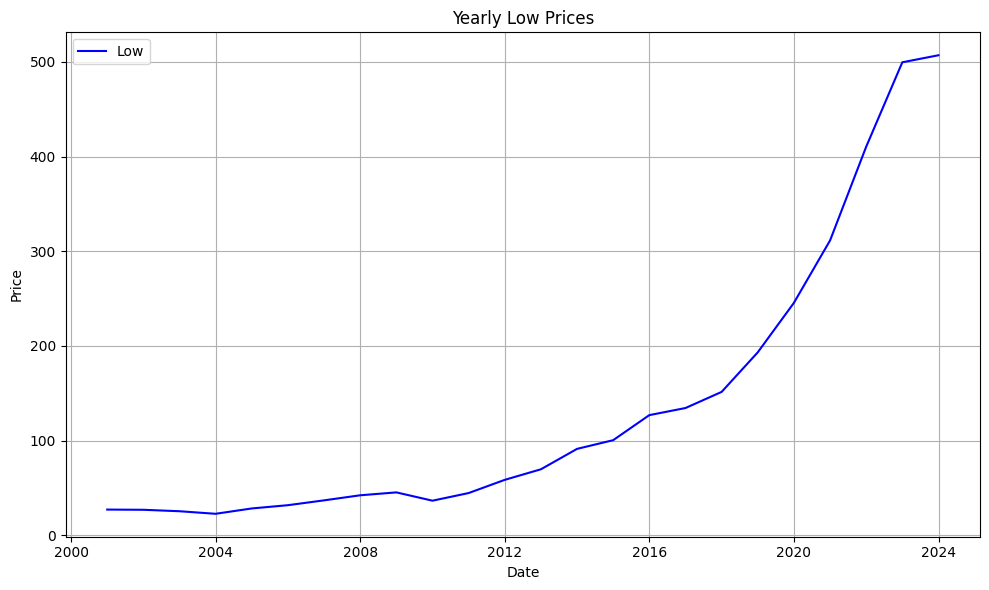

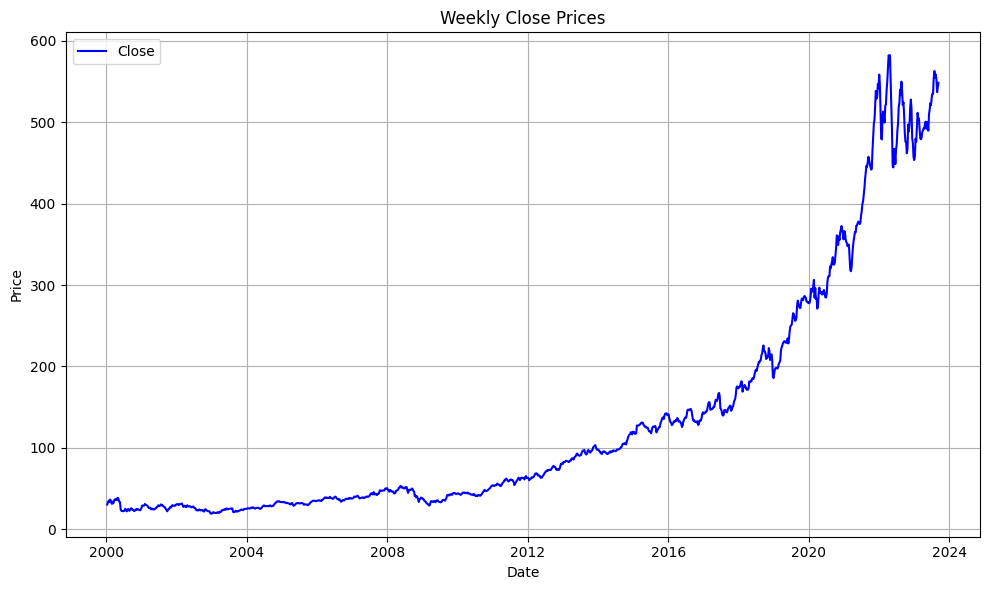

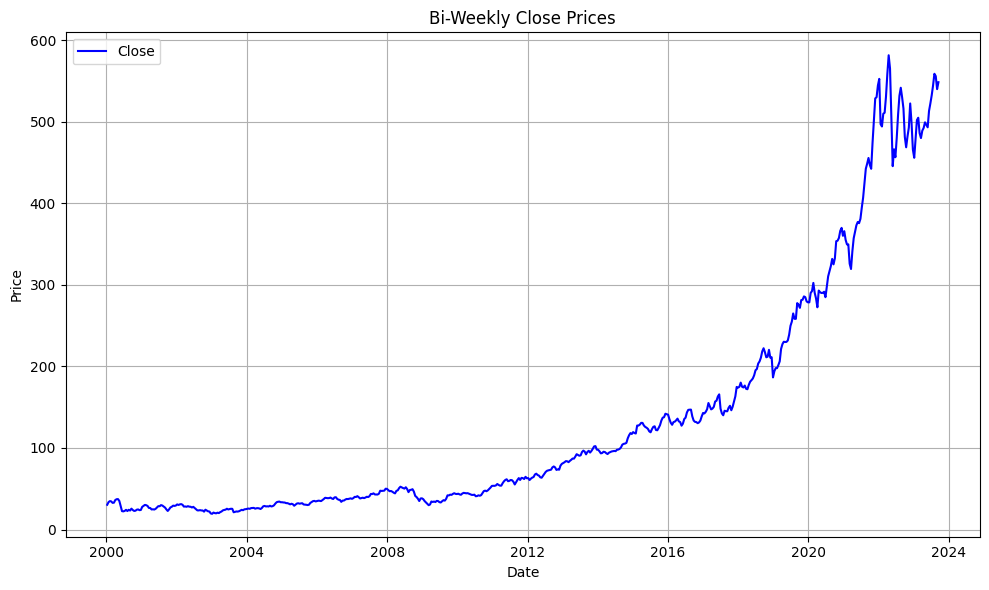

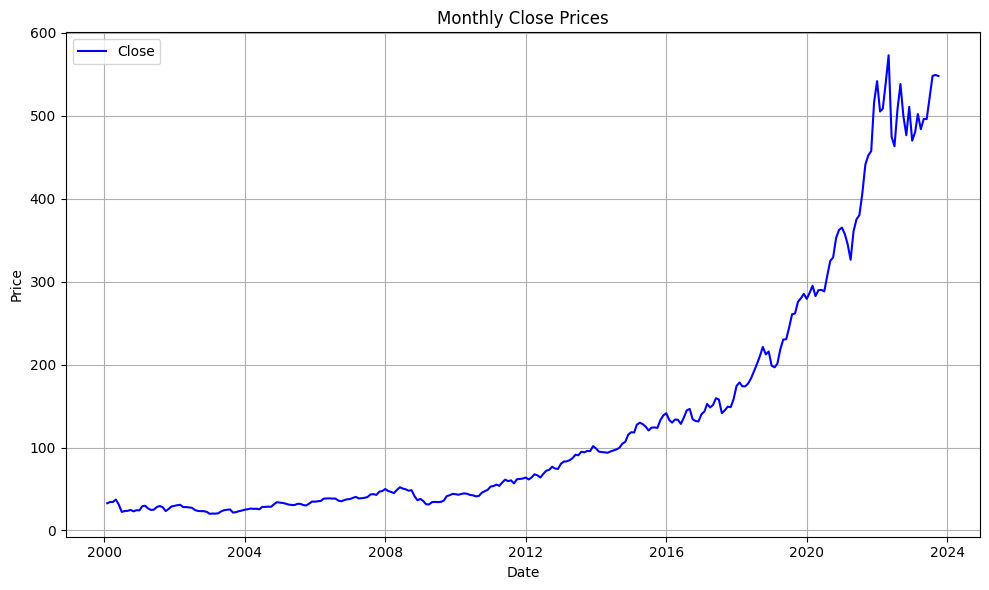

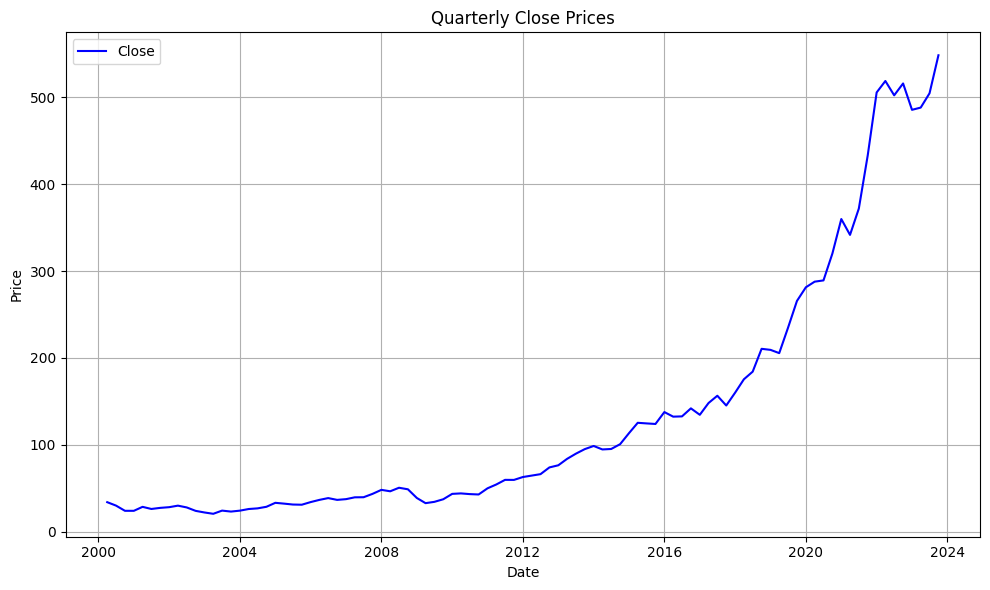

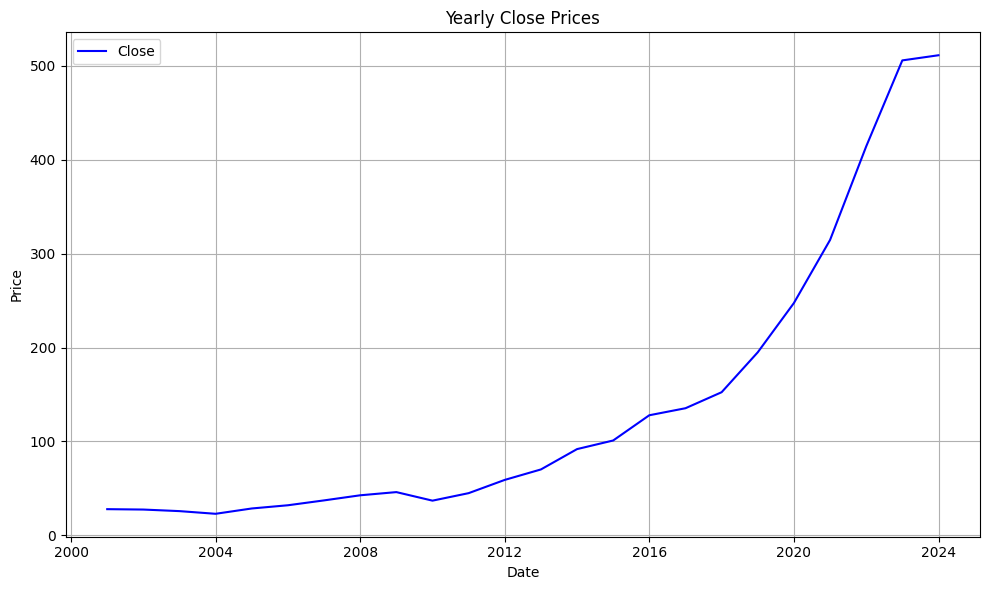

In [ ]:
def plot_column_resampled(df, column, freq, title):
    df_resampled = df[column].resample(freq).mean()  # Resampling.

    plt.figure(figsize=(10, 6))
    plt.plot(df_resampled, label=column, color='blue')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

columns = ['Open', 'High', 'Low', 'Close']
frequencies = [('W', 'Weekly'), ('2W', 'Bi-Weekly'), ('M', 'Monthly'), ('Q', 'Quarterly'), ('A', 'Yearly')]

for column in columns:
    for freq, freq_name in frequencies:
        title = f"{freq_name} {column} Prices"
        plot_column_resampled(df, column, freq, title)


<ipython-input-15-3fb46a278d0c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()  # Resampling. You can use other aggregation methods if preferred.


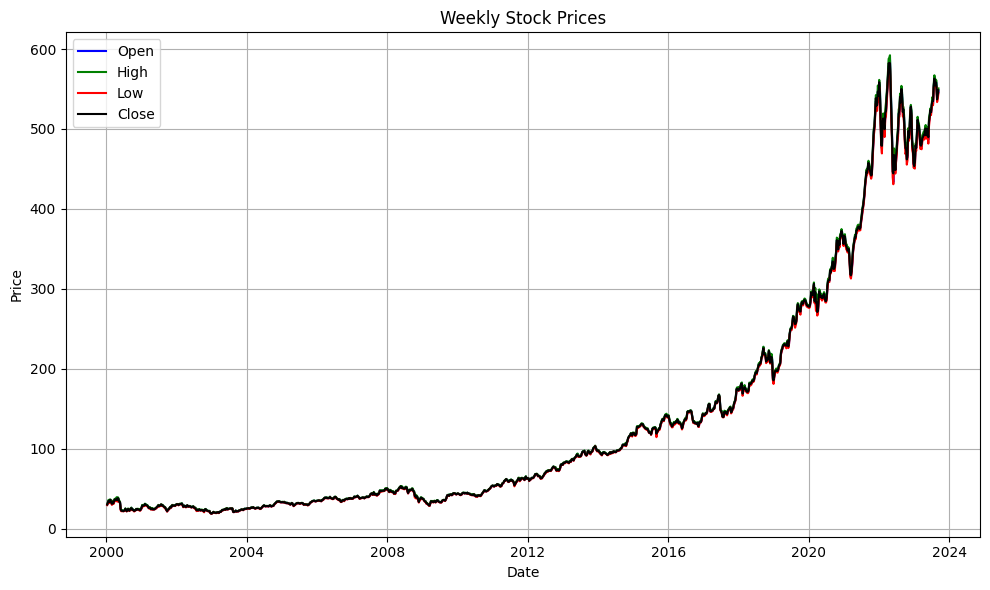

In [17]:
# Weekly
plot_resampled_data(df, 'W', 'Weekly Stock Prices')



<ipython-input-15-3fb46a278d0c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()  # Resampling. You can use other aggregation methods if preferred.


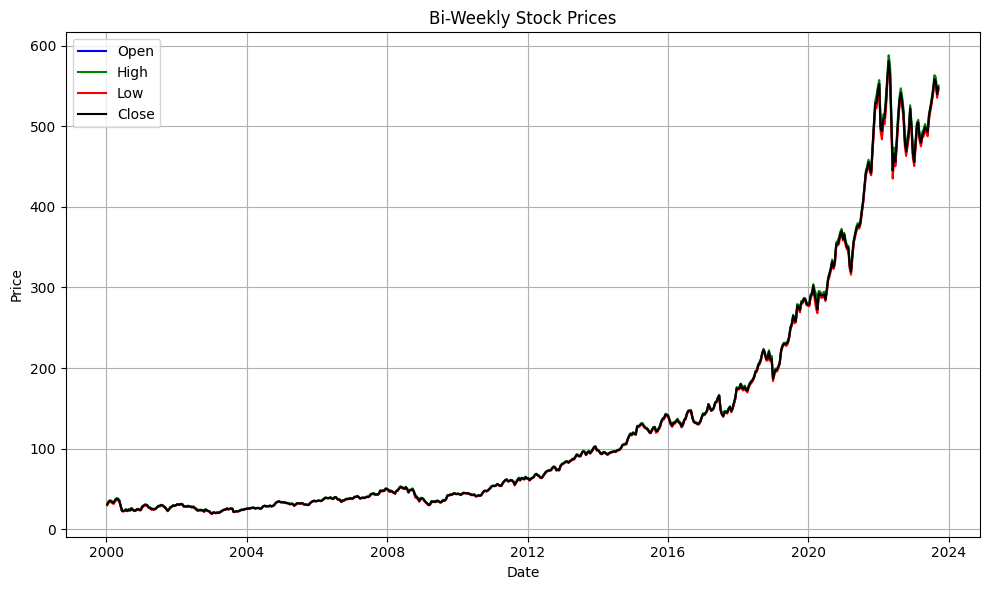

In [18]:
# Bi-Weekly
plot_resampled_data(df, '2W', 'Bi-Weekly Stock Prices')


<ipython-input-15-3fb46a278d0c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()  # Resampling. You can use other aggregation methods if preferred.


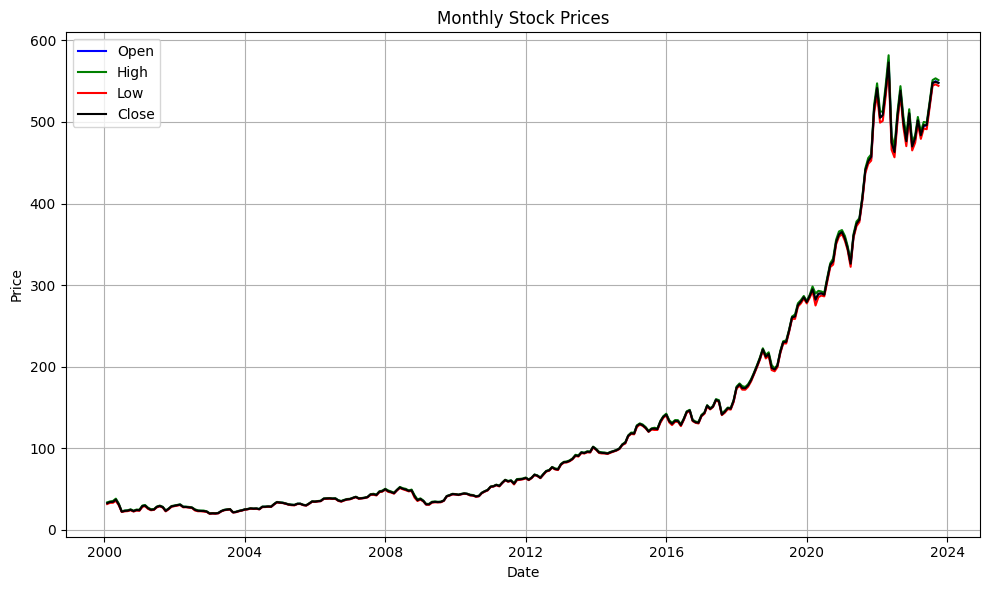

In [19]:
# Monthly
plot_resampled_data(df, 'M', 'Monthly Stock Prices')


<ipython-input-15-3fb46a278d0c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()  # Resampling. You can use other aggregation methods if preferred.


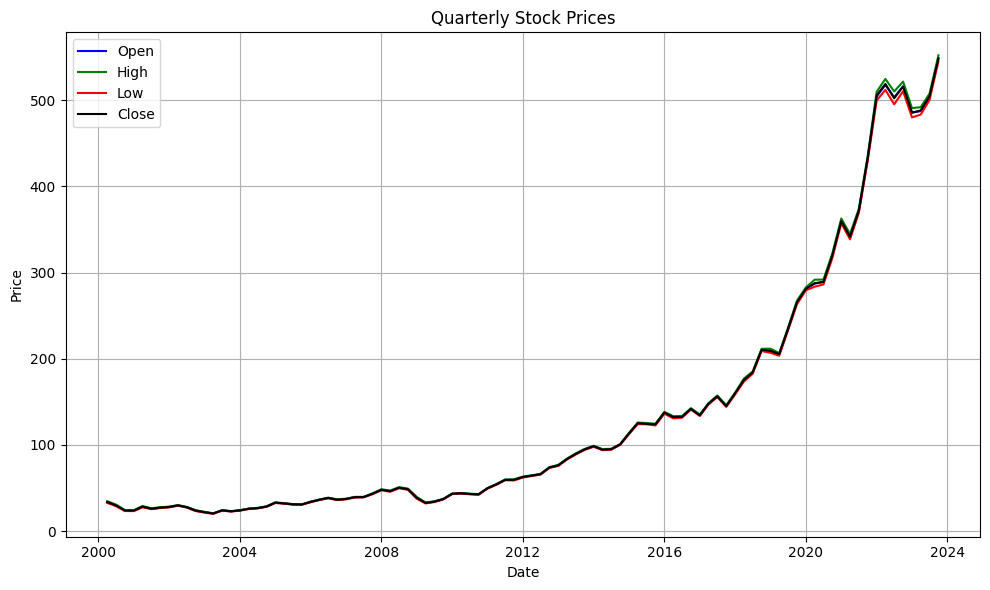

In [20]:
# Quarterly
plot_resampled_data(df, 'Q', 'Quarterly Stock Prices')


<ipython-input-15-3fb46a278d0c>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(freq).mean()  # Resampling. You can use other aggregation methods if preferred.


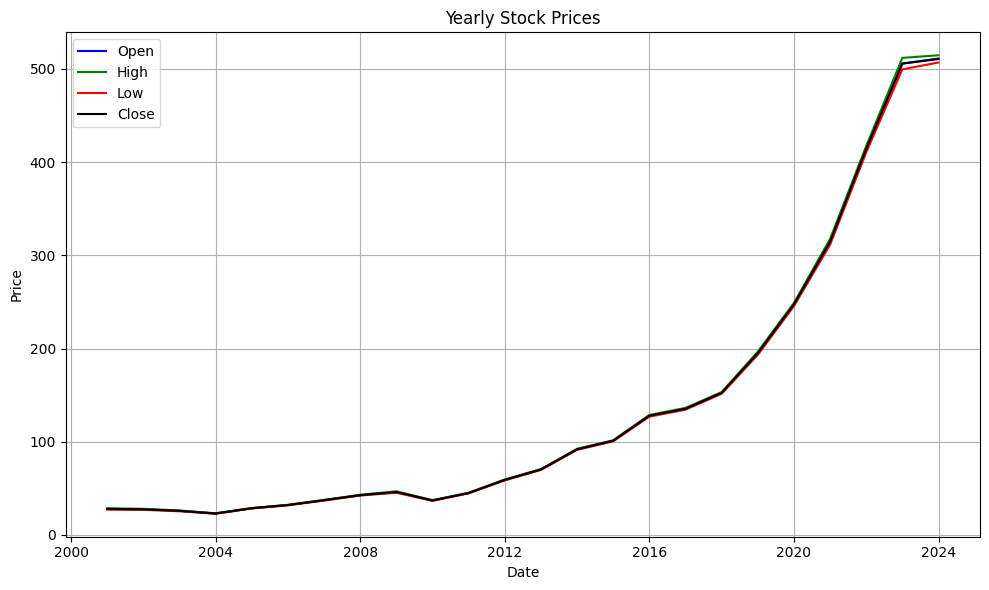

In [21]:
# Yearly
plot_resampled_data(df, 'A', 'Yearly Stock Prices')

In [ ]:
# Yearly
plot_resampled_data(df, 'A', 'Yearly Stock Prices')

In [ ]:
plot_column_resampled(df, column, freq, title)
plot_column_resampled(df, 'Open', 'W', 'Yearly Stock Prices')
plot_column_resampled(df, 'Open', '2W', 'Yearly Stock Prices')
plot_column_resampled(df, 'Open', 'M', 'Yearly Stock Prices')
plot_column_resampled(df, 'Open', 'Q', 'Yearly Stock Prices')
plot_column_resampled(df, 'Open', 'A', 'Yearly Stock Prices')



columns = ['Open', 'High', 'Low', 'Close']
frequencies = [('W', 'Weekly'), ('2W', 'Bi-Weekly'), ('M', 'Monthly'), ('Q', 'Quarterly'), ('A', 'Yearly')]

for column in columns:
    for freq, freq_name in frequencies:
        title = f"{freq_name} {column} Prices"
        plot_column_resampled(df, column, freq, title)



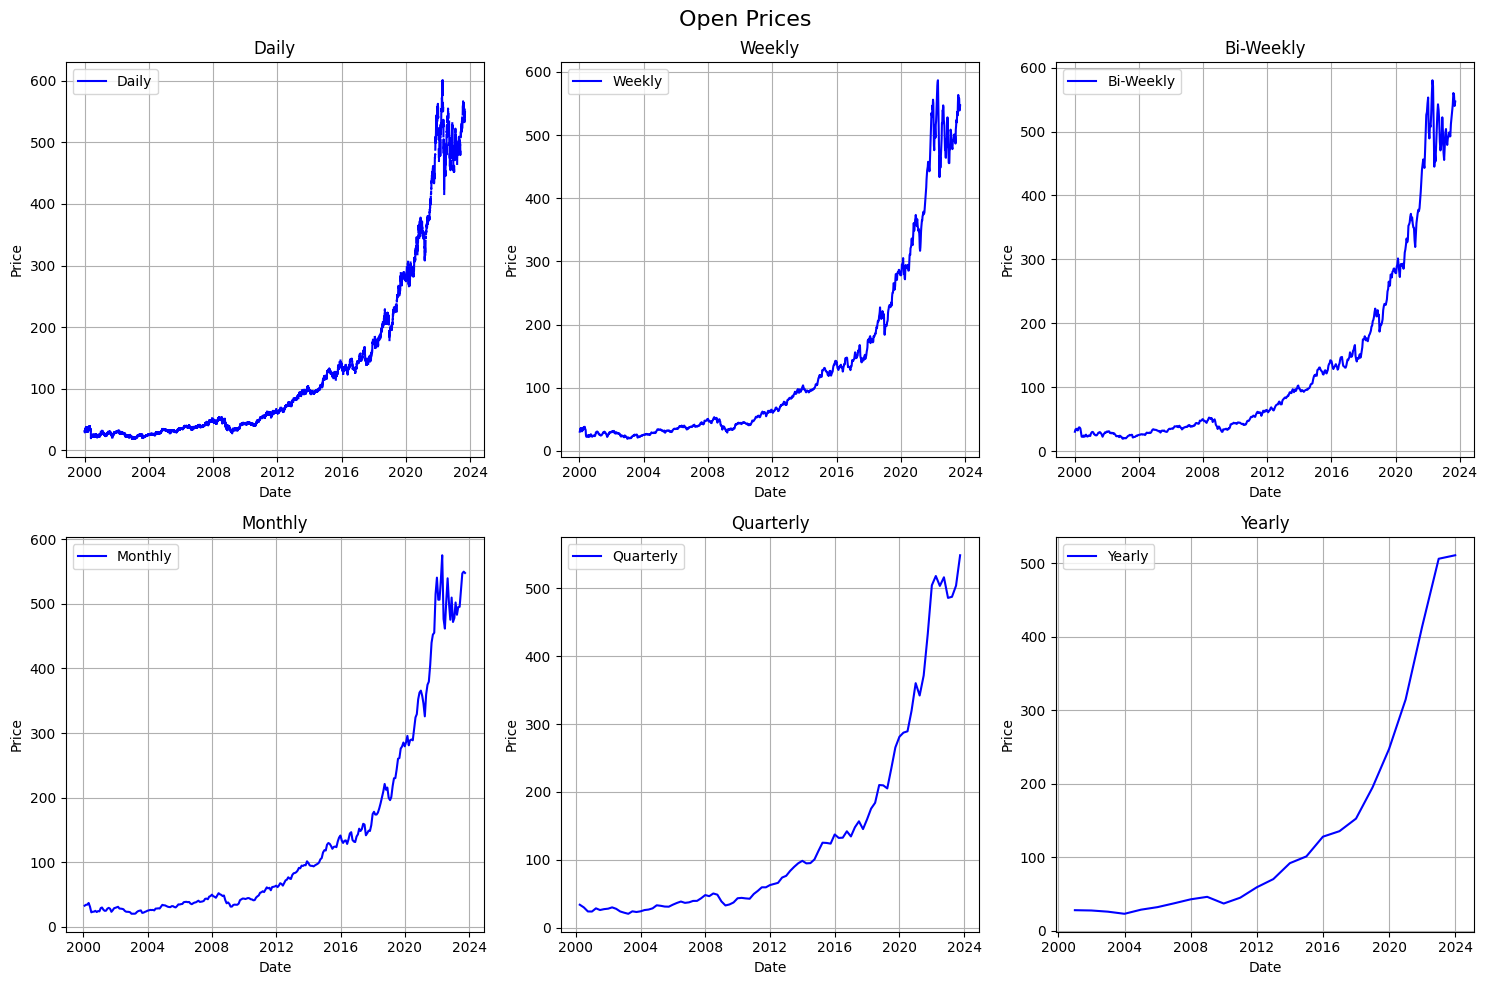

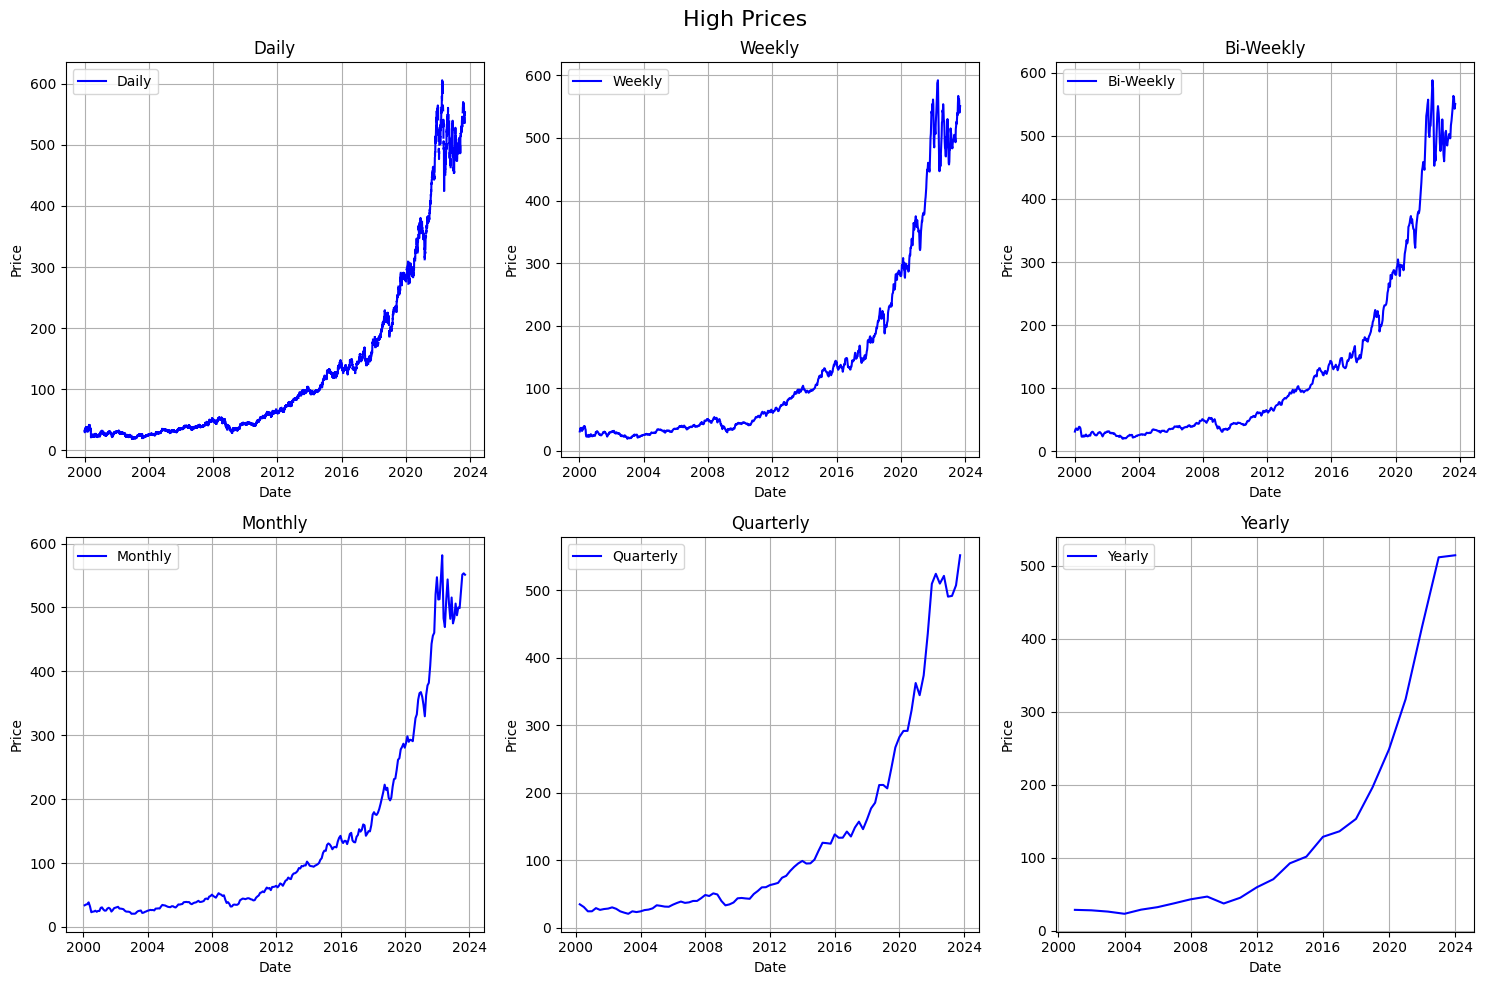

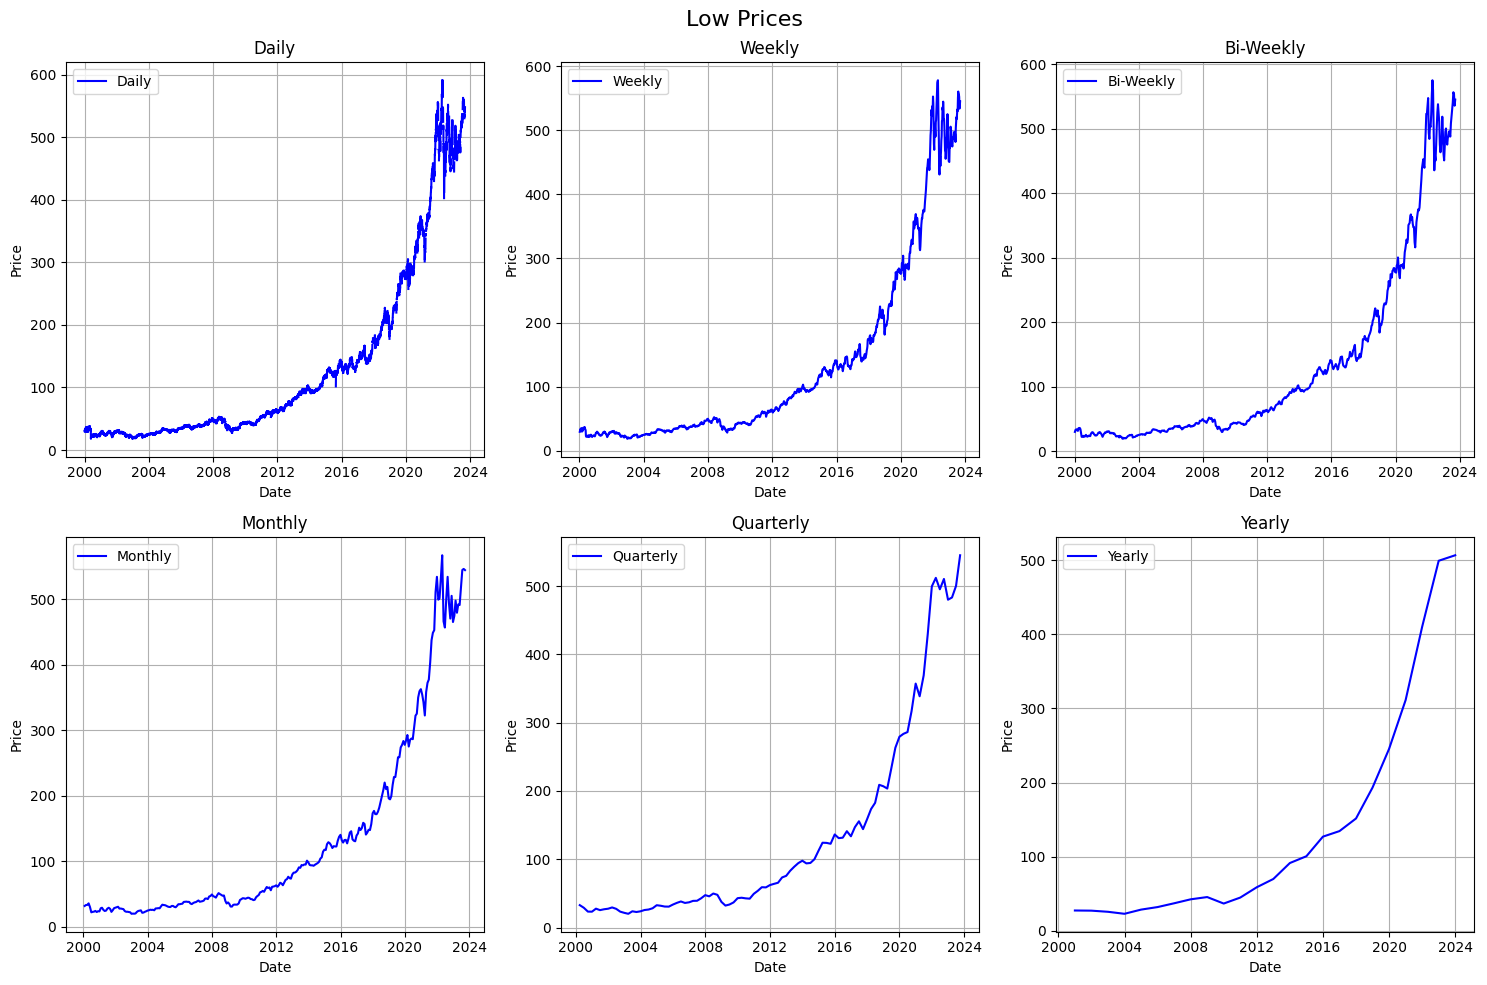

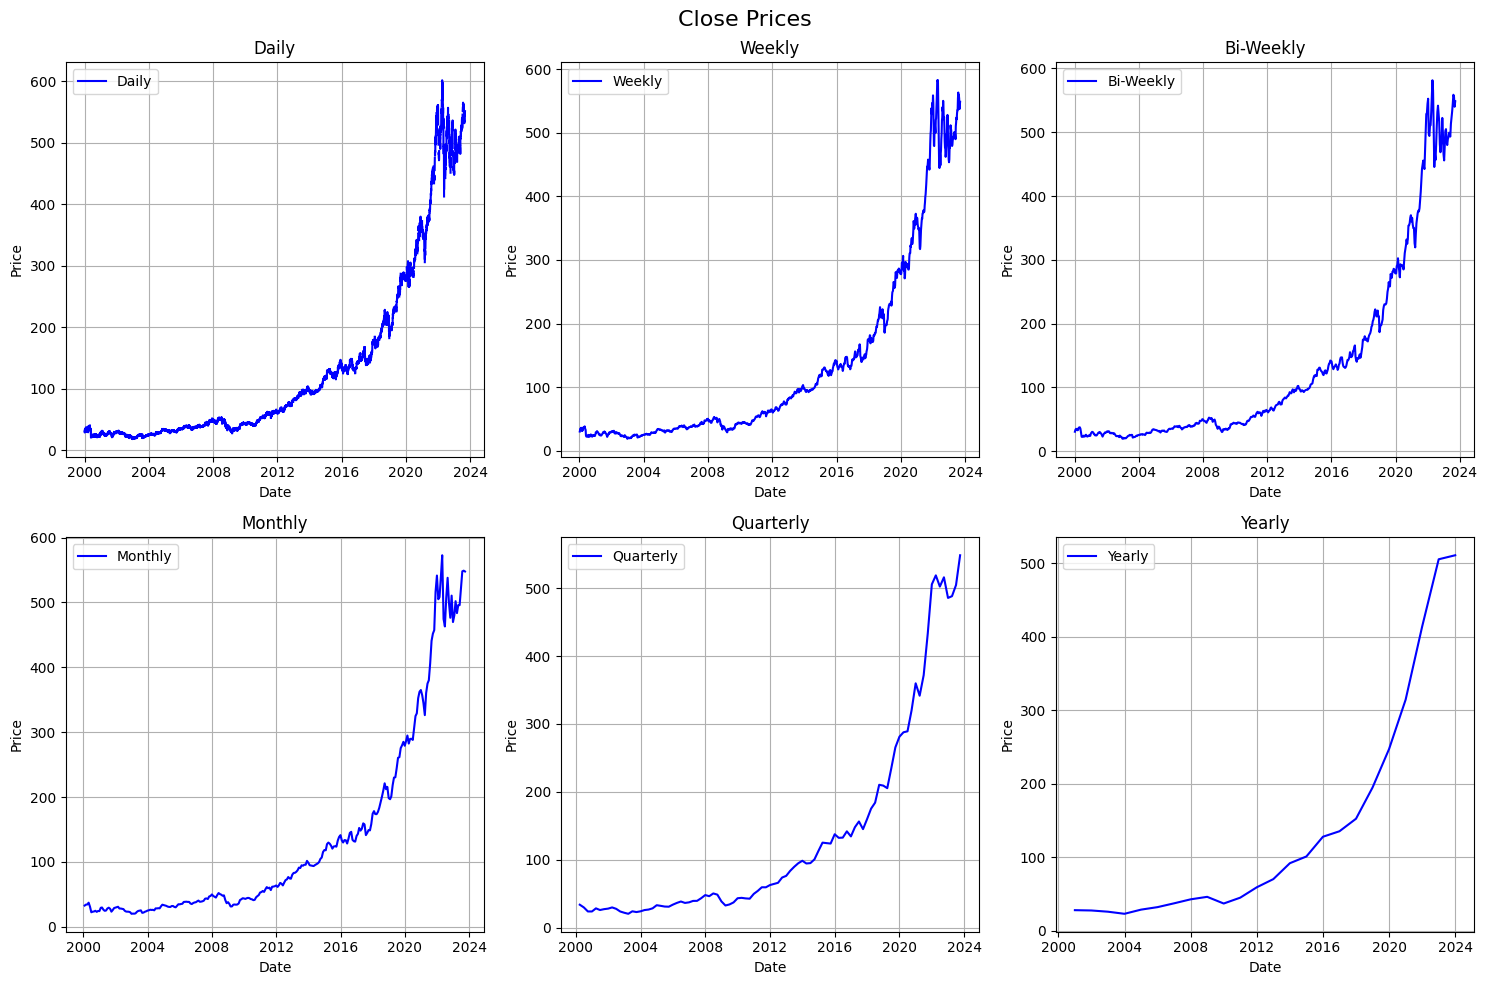

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_column_with_subplot(ax, df, column, freq, title):
    df_resampled = df[column].resample(freq).mean()
    ax.plot(df_resampled, label=title, color='blue')

    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

columns = ['Open', 'High', 'Low', 'Close']
frequencies = [
    ('D', 'Daily'),
    ('W', 'Weekly'),
    ('2W', 'Bi-Weekly'),
    ('M', 'Monthly'),
    ('Q', 'Quarterly'),
    ('A', 'Yearly')
]

for column in columns:
    fig, axs = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
    fig.suptitle(f"{column} Prices", fontsize=16)

    for ax, (freq, freq_name) in zip(axs.ravel(), frequencies):
        title = f"{freq_name}"
        plot_column_with_subplot(ax, df, column, freq, title)

plt.show()
